In [25]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
from tensorflow.keras.preprocessing import sequence

# Load the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

# Pad the sequences to the same length
X_train = sequence.pad_sequences(X_train, maxlen=250)  # Reduced sequence length
X_test = sequence.pad_sequences(X_test, maxlen=250)  # Reduced sequence length

# Define the model
model = Sequential([
    Embedding(5000, 32, input_length=250),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=4, batch_size=64, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy*100))

Epoch 1/4
391/391 [==============================] - 10s 24ms/step - loss: 0.4140 - accuracy: 0.7906
Epoch 2/4
391/391 [==============================] - 10s 25ms/step - loss: 0.1438 - accuracy: 0.9488
Epoch 3/4
391/391 [==============================] - 10s 24ms/step - loss: 0.0291 - accuracy: 0.9931
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.5648 - accuracy: 0.8586
Accuracy: 85.86%


782/782 [==============================] - 4s 5ms/step


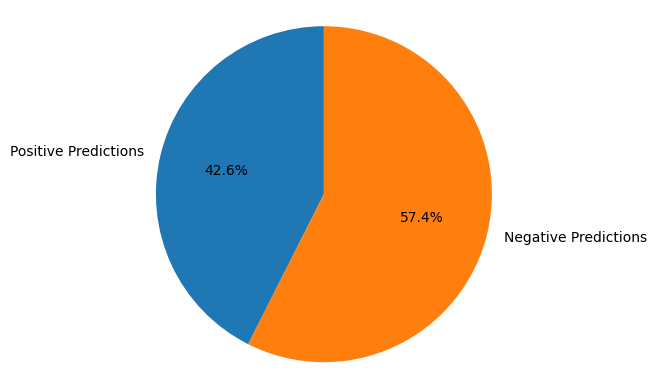

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Generate predictions
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.92).astype(int)  # Convert probabilities to class labels

# Count positive and negative predictions
positive_predictions = np.sum(y_pred)
negative_predictions = len(y_pred) - positive_predictions

# Plot the pie chart
labels = 'Positive Predictions', 'Negative Predictions'
sizes = [positive_predictions, negative_predictions]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()